## Introduction 

Boston is Massachusetts’ capital and largest city. Founded in 1630, it’s one of the oldest cities in the U.S. The key role it played in the American Revolution is highlighted on the Freedom Trail, a 2.5-mile walking route of historic sites that tells the story of the nation’s founding. One stop, former meeting house Faneuil Hall, is a popular marketplace. Boston is one of the oldest cities in the United States, founded on the Shawmut Peninsula in 1630 by Puritan settlers from England. It was the scene of several key events of the American Revolution, such as the Boston Massacre, the Boston Tea Party, the Battle of Bunker Hill, and the Siege of Boston. Upon gaining U.S. independence from Great Britain, it continued to be an important port and manufacturing hub as well as a center for education and culture. The city has expanded beyond the original peninsula through land reclamation and municipal annexation. Its rich history attracts many tourists, with Faneuil Hall alone drawing more than 20 million visitors per year. Boston's many firsts include the United States' first public park (Boston Common, 1634), first public or state school (Boston Latin School, 1635) and first subway system (Tremont Street Subway, 1897).


<img src="http://d279m997dpfwgl.cloudfront.net/wp/2018/01/lance-anderson-393963-1000x667.jpg">

## Importing our libraries in Python

Here, we will use some Python libraries to create visual models to represent data. Understanding the data and understanding of how each part relates is very important. With this, we can understand which are the most violent neighborhoods in Boston, the most common crimes in the area and also what time we can walk safely in the beautiful tourist spots of the city.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline 

## Getting the data

In [ ]:
data = pd.read_csv('/content/crime.csv', encoding='latin-1')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

## Some interesting information

Here we can extract some relevant information, such as the most violent neighborhoods, the most common crimes, the year with the highest number of crimes, the most frequent time, among other things. Just be creative, you can extract cool stuff from that data.

In [ ]:
max_street_crime = data['STREET'].value_counts().index[0]
max_year_crime = data['YEAR'].value_counts().index[0]
max_hour_crime = data['HOUR'].value_counts().index[0]
max_month_crime = data['MONTH'].value_counts().index[0]
max_day_crime = data['DAY_OF_WEEK'].value_counts().index[0]

month = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

print('Street with higher occurrence of crimes:', max_street_crime)
print('Year with highest crime occurrence:', max_year_crime)
print('Hour with highest crime occurrence:', max_hour_crime)
print('Month with highest crime occurrence:', month[max_month_crime-1], max_month_crime)
print('Day with highest crime occurrence:', max_day_crime)

Street with higher occurrence of crimes: WASHINGTON ST
Year with highest crime occurrence: 2017
Hour with highest crime occurrence: 17
Month with highest crime occurrence: August 8
Day with highest crime occurrence: Friday


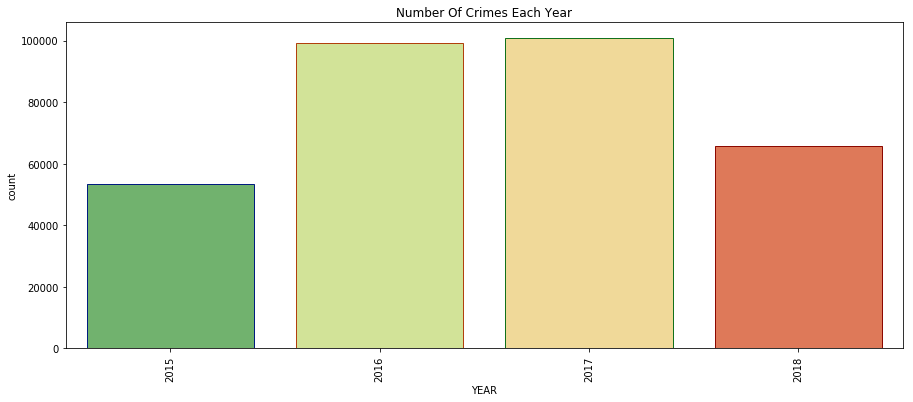

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('YEAR',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Year')
plt.show()

In this graph, we can see that 2016 and 2017 had the highest incidence of crime in the region.

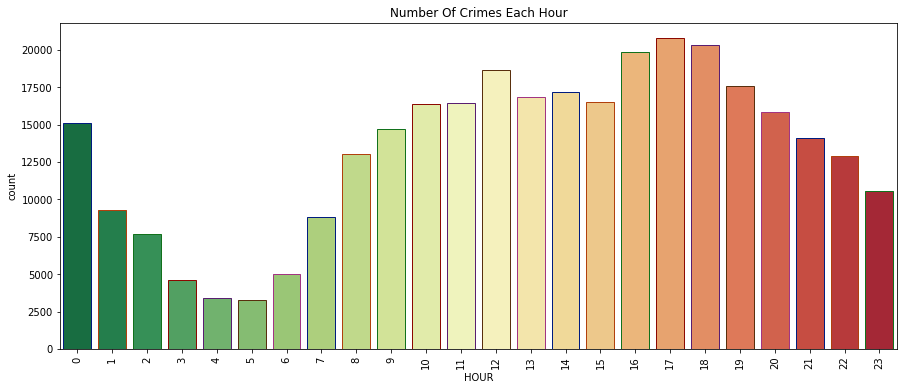

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('HOUR',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Hour')
plt.show()

Here we can see that from 7 am onwards, the occurrence of crimes begins to rise, peaking at between 5 and 6 pm. We need to get more details from this data and understand how crimes occur in the city of Boston.

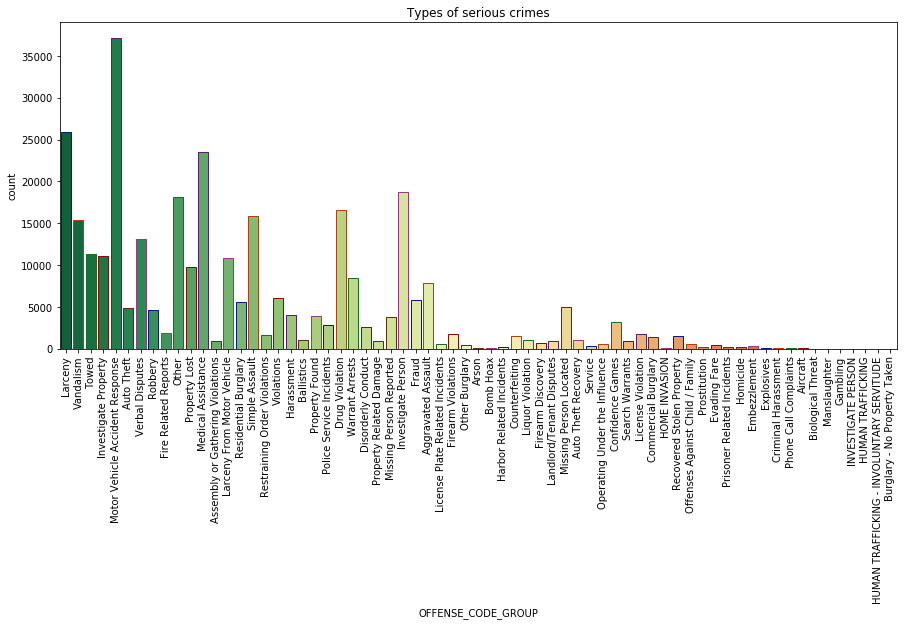

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('OFFENSE_CODE_GROUP',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Types of serious crimes')
plt.show()

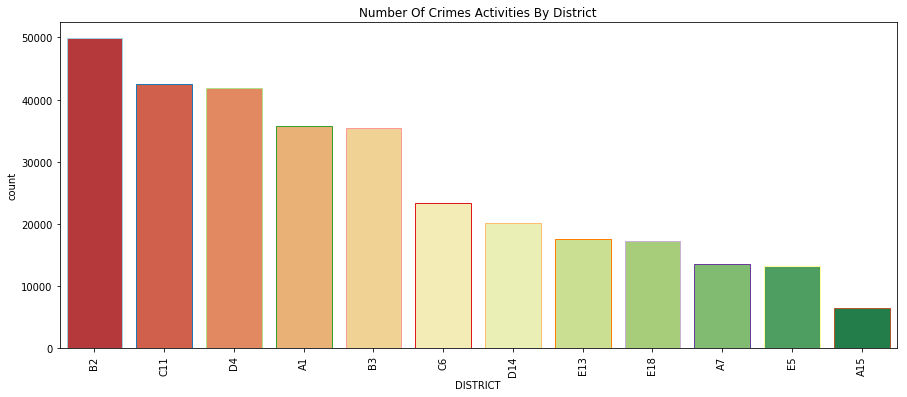

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('DISTRICT',data=data,palette='RdYlGn',edgecolor=sns.color_palette('Paired',20),order=data['DISTRICT'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Crimes Activities By District')
plt.show()

In this graph, we organize the data by the district to observe the occurrence of crimes in each of them. With the ordered date, we can see and conclude that the neighborhood with the highest incidents of crime is B12, followed respectively by C11, D4, B4, C6, D14, E13, E18, A7, E5, and A15.

## Relationship between Type of Crimes and the District

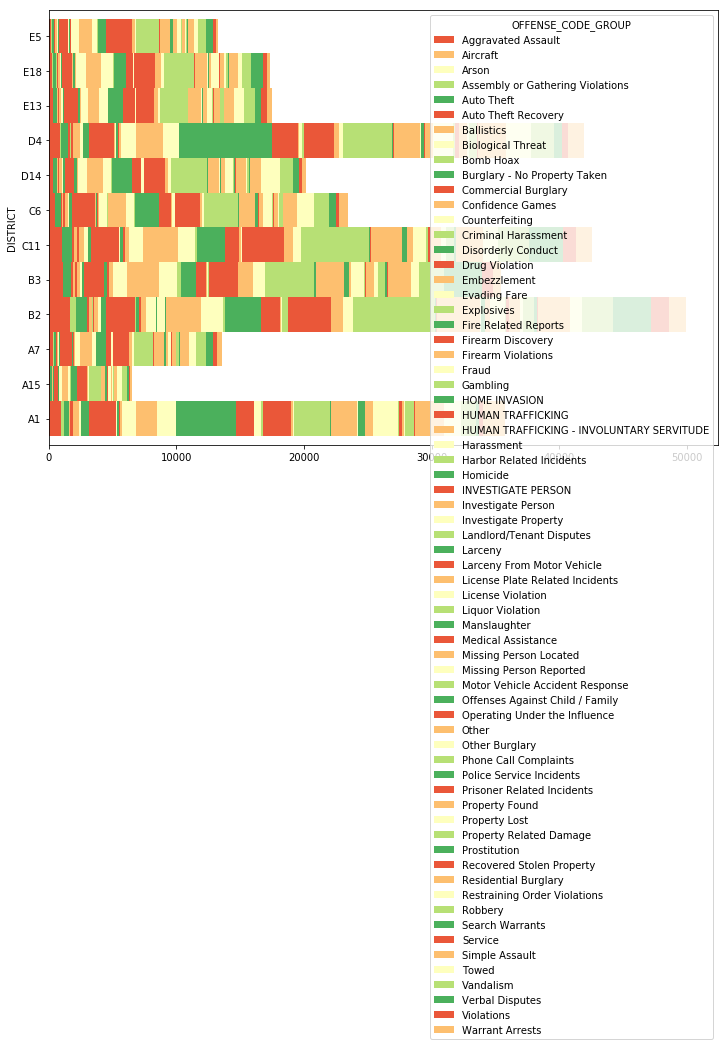

In [ ]:
pd.crosstab(data.DISTRICT,data.OFFENSE_CODE_GROUP).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',5))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Relationship between Type of Crimes and the Year

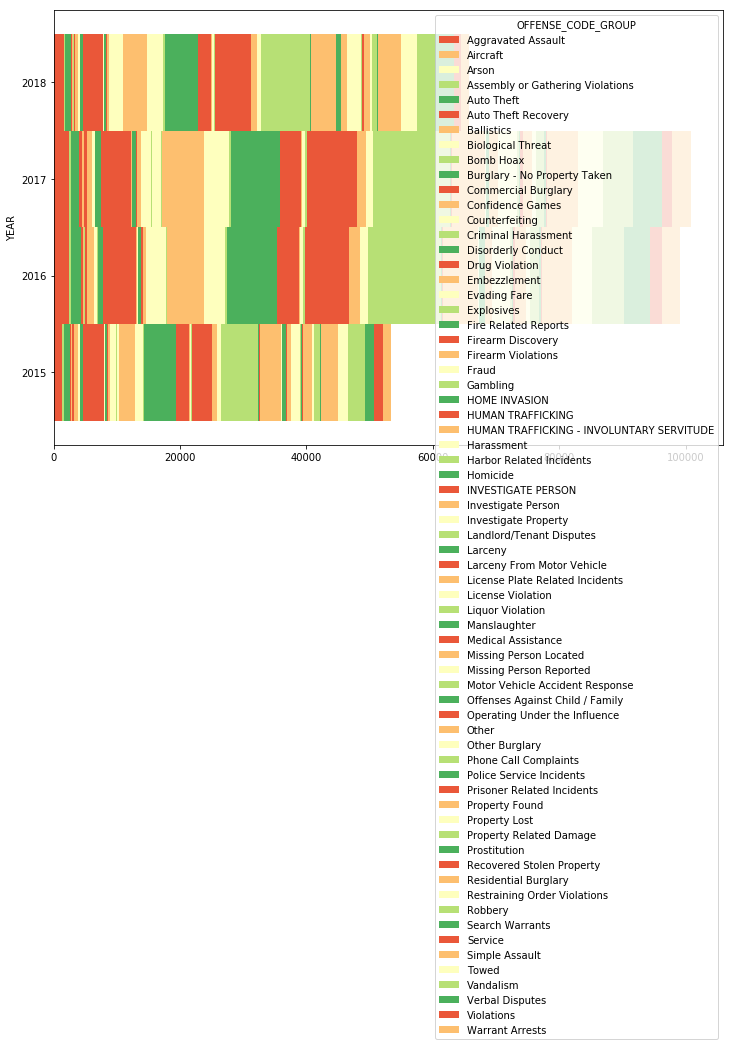

In [ ]:
pd.crosstab(data.YEAR,data.OFFENSE_CODE_GROUP).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',5))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Relationship between Year and District (Number of crimes)

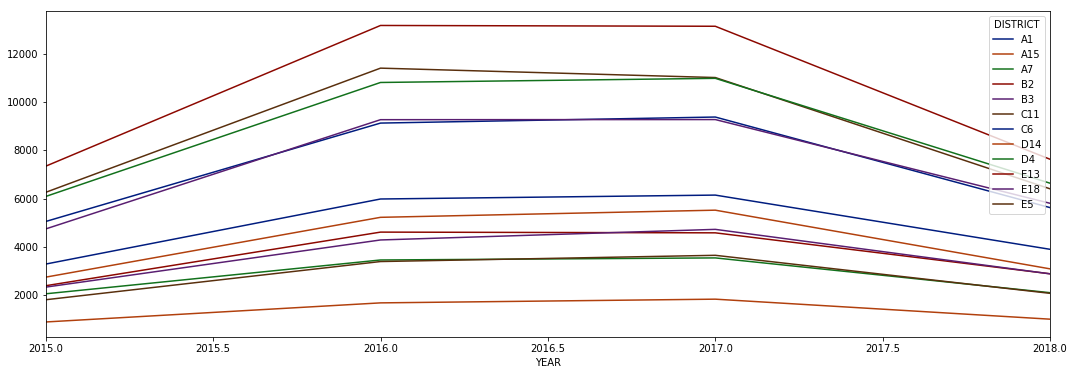

In [ ]:
G1=data[data['MONTH'].isin(data['MONTH'].value_counts()[1:11].index)]
pd.crosstab(G1.YEAR,G1.DISTRICT).plot(color=sns.color_palette('dark',6))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Boston City Vandalism

In [ ]:

vand=data.loc[data.OFFENSE_CODE_GROUP=='Vandalism'][['Lat','Long']]
vand.Lat.fillna(0, inplace = True)
vand.Long.fillna(0, inplace = True) 

BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=11)
HeatMap(data=vand, radius=16).add_to(BostonMap)

BostonMap

## Boston Crime Map

In [ ]:
my = data.dropna()
df_counters = pd.DataFrame(
    {'ID' : id,
     'Name' : my.OFFENSE_CODE_GROUP,
     'lat' : my.Lat,
     'long' : my.Long,
     'region' : my.DISTRICT,
     'year': my.YEAR,
     'month': my.MONTH
    })

arrayName = []
for i in my.OFFENSE_CODE_GROUP:
    arrayName.append(i)

df_counters.head()
locations = df_counters[['lat', 'long']]
locationlist = locations.values.tolist()
BostonMap=folium.Map(location=[42.356145,-71.064083],zoom_start=11)
for point in range(0, len(locationlist)):
    string = arrayName[point]
    folium.Marker(locationlist[point], popup=string).add_to(BostonMap)
BostonMap

